img shape:  (258, 410, 3)


(np.float64(-0.5), np.float64(409.5), np.float64(257.5), np.float64(-0.5))

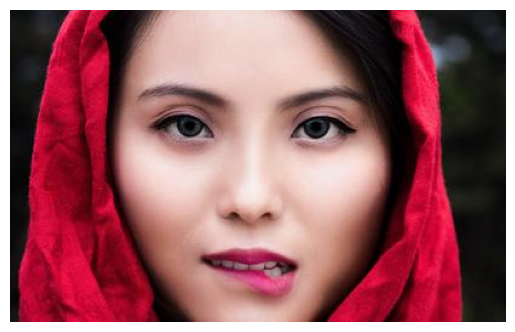

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread("./images/girl3.jpg")
print("img shape: ", img.shape)
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')

In [7]:
X = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
print(X.shape)

(105780, 3)


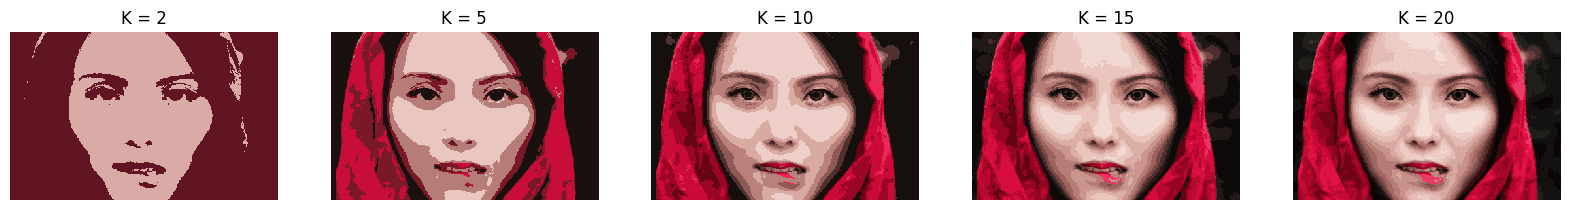

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, k in enumerate([2, 5, 10, 15, 20]):
    kmeans = KMeans(n_clusters=k).fit(X)
    label = kmeans.predict(X)

    img_clustered = np.zeros_like(X)

    # replace each pixel by its center
    for i in range(k):
        img_clustered[label == i] = kmeans.cluster_centers_[i]

    # reshape and display output image
    img_clustered_reshaped = img_clustered.reshape((img.shape[0], img.shape[1], img.shape[2]))

    axes[idx].imshow(img_clustered_reshaped.astype('uint8'), interpolation='nearest')
    axes[idx].axis('off')
    axes[idx].set_title(f"K = {k}")


In [54]:
n_clusters=6
kmeans = KMeans(n_clusters=n_clusters).fit(X)
label = kmeans.predict(X)

clustered_flattened = np.zeros_like(X)
print(label)
print(clustered_flattened.shape)
# replace each pixel by its center
for cluster_idx in range(n_clusters):
    cluster_pixel_indices = (label == cluster_idx)
    clustered_flattened[cluster_pixel_indices] = kmeans.cluster_centers_[cluster_idx]
# for i in range(clustered_flattened.shape[0]):
#     clustered_flattened[i] = kmeans.cluster_centers_[label[i]]
# reshape and display output image
img_clustered_reshaped = clustered_flattened.reshape((img.shape[0], img.shape[1], img.shape[2]))
print("img_clustered_reshaped", img_clustered_reshaped)
print("img_clustered_reshaped", img_clustered_reshaped.shape)

[0 0 0 ... 0 0 0]
(105780, 3)
img_clustered_reshaped [[[26 17 16]
  [26 17 16]
  [26 17 16]
  ...
  [26 17 16]
  [26 17 16]
  [26 17 16]]

 [[26 17 16]
  [26 17 16]
  [26 17 16]
  ...
  [26 17 16]
  [26 17 16]
  [26 17 16]]

 [[26 17 16]
  [26 17 16]
  [26 17 16]
  ...
  [26 17 16]
  [26 17 16]
  [26 17 16]]

 ...

 [[26 17 16]
  [26 17 16]
  [26 17 16]
  ...
  [26 17 16]
  [26 17 16]
  [26 17 16]]

 [[26 17 16]
  [26 17 16]
  [26 17 16]
  ...
  [26 17 16]
  [26 17 16]
  [26 17 16]]

 [[26 17 16]
  [26 17 16]
  [26 17 16]
  ...
  [26 17 16]
  [26 17 16]
  [26 17 16]]]
img_clustered_reshaped (258, 410, 3)


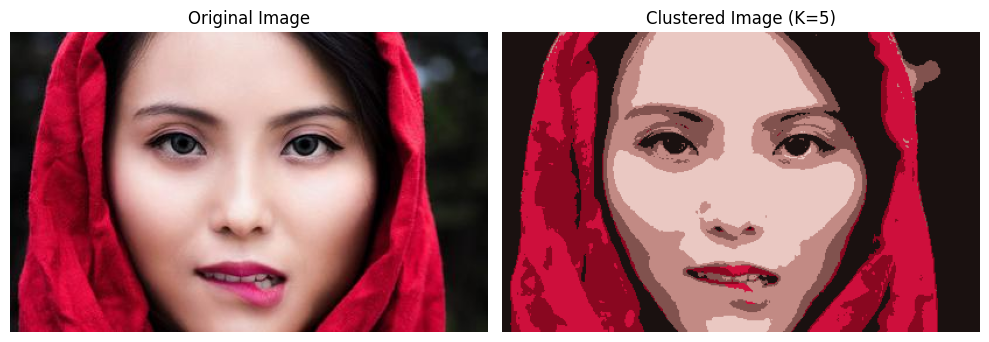

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(img_clustered_reshaped)
axes[1].set_title("Clustered Image (K=5)")
axes[1].axis('off')

plt.tight_layout()
plt.show()